In [80]:
#imorting libraries to work with
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Arranging Data in lists then into arrays

In [81]:
with open('E:\Oubaid\Geol-Geoph\MR2-G²\sem1\Infographie geophysique\Projet Interpolation\Demogrid.dat') as dat_file, open('Demogrid.csv','w') as csv_file:
    csv_writer = csv.writer(csv_file)
    
#read lines of the file, append lines in a list of strings inside "lines".
    for line in dat_file:
        row = [field.strip() for field in line.split(',')]
        if len(row) == 3:
            csv_writer.writerow(row)

In [82]:
#convert file to Pandas DataFrame
d=pd.read_csv("Demogrid.csv")
d.head(5)
lons = d['"Easting"'].values
lats = d['"Northing"'].values
data = d['"Elevation"'].values

## create the projection grid

In [72]:
grid_lon = np.arange(np.amin(lons), np.amax(lons), 0.05) #grid_space is the desired delta/step of the output array
grid_lat = np.arange(np.amin(lats), np.amax(lats), 0.05)

## Apply the Krigging

In [73]:
from pykrige.ok import OrdinaryKriging
OK = OrdinaryKriging(lons, lats, data, variogram_model='gaussian',nlags=2)
z1,ss1= OK.execute('grid', grid_lon, grid_lat)

In [74]:
# Convert to grid
xgrid, ygrid = np.meshgrid(grid_lon, grid_lat)
# Arrange the interpolation grid data
df_grid = pd.DataFrame(dict(long=xgrid.flatten(),lat=ygrid.flatten()))
# Add interpolation results
df_grid.describe()

,long,lat
count,25200.000000,25200.000000
mean,4.475000,3.475000
std,2.598088,2.020714
min,0.000000,0.000000
25%,2.237500,1.737500
50%,4.475000,3.475000
75%,6.712500,5.212500
max,8.950000,6.950000


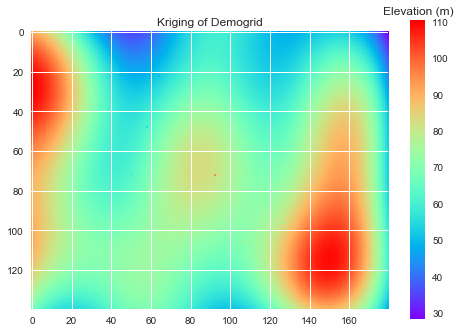

In [76]:
# plot results
plt.imshow(z1, cmap="rainbow")
plt.title('Kriging of Demogrid')
plt.style.use("seaborn")
plt.colorbar(orientation="vertical").ax.set_title('Elevation (m)')
plt.axis(x="Latitude", y="Longitude")
plt.show()